In [1]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import numpy as np


In [2]:
deliv=pd.read_excel('deliveries.xlsx')

In [3]:
deliv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
matches=pd.read_excel('matches.xlsx')

In [5]:
deliv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
 pd.options.display.max_rows = 9

In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
for col in matches.columns:
    print(col, matches[col].nunique())

id 756
season 12
city 32
date 546
team1 15
team2 15
toss_winner 15
toss_decision 2
result 3
dl_applied 2
winner 15
win_by_runs 89
win_by_wickets 11
player_of_match 226
venue 41
umpire1 61
umpire2 65
umpire3 25


In [9]:
for col in matches.columns:
    if matches[col].nunique()<66:
        print(col, matches[col].unique())

season [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016 2018 2019]
city ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']
team1 ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
team2 ['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers

In [10]:
pd.options.display.max_columns = 30

In [11]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05 00:00:00,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06 00:00:00,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07 00:00:00,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08 00:00:00,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08 00:00:00,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
matches['date']=pd.to_datetime(matches['date'])

In [13]:
matches['year']=matches['date'].dt.year
matches['month']=matches['date'].dt.month
matches['day']=matches['date'].dt.day

In [14]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month,day
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017,4,5
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017,4,6
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017,4,7
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017,4,8
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017,4,8


In [15]:
matches['year'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [16]:
matches['month'].unique()

array([ 4,  5,  6,  3,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int64)

In [17]:
matches['day'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 26, 27, 28, 29, 30,  1,  2,  3,  4, 25, 31],
      dtype=int64)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

successful players, teams and factors contributing to win and or loss

suggest teams or players for endorsing products

count of wins by each team (winner)

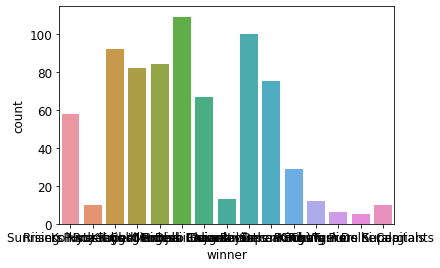

In [19]:
sns.countplot(matches['winner'])

In [20]:
matches['winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [21]:
matches[(matches['winner']=='Delhi Daredevils')| (matches['winner']=='Delhi Capitals')]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month,day
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN,2017,4,11
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN,2017,4,15
38,39,2017,Delhi,2017-05-02,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,6,Mohammed Shami,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN,2017,5,2
40,41,2017,Delhi,2017-05-04,Gujarat Lions,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,RR Pant,Feroz Shah Kotla,M Erasmus,Nitin Menon,NaN,2017,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11331,2019,Jaipur,2019-04-22,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,RR Pant,Sawai Mansingh Stadium,S Ravi,Nanda Kishore,Yeshwant Barde,2019,4,22
741,11337,2019,Delhi,2019-04-28,Delhi Capitals,Royal Challengers Bangalore,Delhi Capitals,bat,normal,0,Delhi Capitals,16,0,S Dhawan,Feroz Shah Kotla Ground,Bruce Oxenford,KN Ananthapadmanabhan,C Shamshuddin,2019,4,28
748,11344,2019,Delhi,2019-04-05,Rajasthan Royals,Delhi Capitals,Rajasthan Royals,bat,normal,0,Delhi Capitals,0,5,A Mishra,Feroz Shah Kotla Ground,Ian Gould,Anil Dandekar,Nitin Menon,2019,4,5
753,11413,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,2019,8,5


In [22]:
matches[(matches['winner']=='Rising Pune Supergiants')| (matches['winner']=='Pune Warriors')| (matches['winner']=='Rising Pune Supergiant')]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month,day
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017,4,6
16,17,2017,Bangalore,2017-04-16,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Rising Pune Supergiant,27,0,BA Stokes,M Chinnaswamy Stadium,KN Ananthapadmanabhan,C Shamshuddin,NaN,2017,4,16
24,25,2017,Pune,2017-04-22,Sunrisers Hyderabad,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,6,MS Dhoni,Maharashtra Cricket Association Stadium,AY Dandekar,A Deshmukh,NaN,2017,4,22
27,28,2017,Mumbai,2017-04-24,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,3,0,BA Stokes,Wankhede Stadium,A Nand Kishore,S Ravi,NaN,2017,4,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,598,2016,Hyderabad,2016-04-26,Sunrisers Hyderabad,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,1,Rising Pune Supergiants,34,0,AB Dinda,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,CK Nandan,NaN,2016,4,26
608,609,2016,Delhi,2016-05-05,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,AM Rahane,Feroz Shah Kotla,C Shamshuddin,RJ Tucker,NaN,2016,5,5
624,625,2016,Visakhapatnam,2016-05-17,Delhi Daredevils,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,1,Rising Pune Supergiants,19,0,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Nitin Menon,C Shamshuddin,NaN,2016,5,17
628,629,2016,Visakhapatnam,2016-05-21,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon,NaN,2016,5,21


In [23]:
matches=matches.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant', 'Pune Warriors': 'Rising Pune Supergiant', 'Delhi Daredevils': 'Delhi Capitals', 'Deccan Chargers': 'Sunrisers Hyderabad' })

# WHICH TEAMS HAVE WON THE HIGEST NUMBER OF MATCHES

Text(0.5, 0, 'No. of matches')

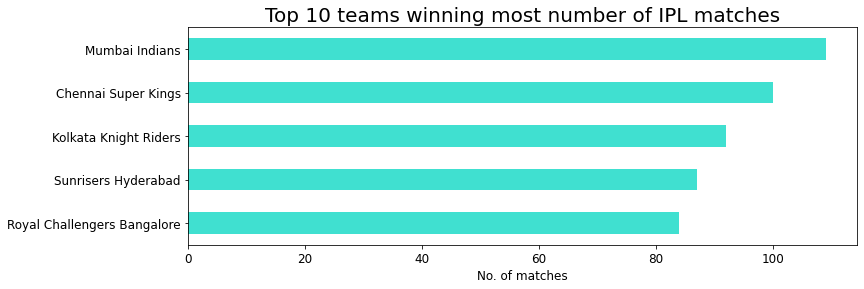

In [24]:
matches['winner'].value_counts().sort_values(ascending=False).head(5).iloc[::-1].plot(kind='barh', figsize=(12,4), color='turquoise')
plt.title('Top 10 teams winning most number of IPL matches', {'fontsize':20})
plt.xlabel('No. of matches')


# Which players have won the most number of 'Man of the Match' tropies

Text(0.5, 0, 'No. of matches')

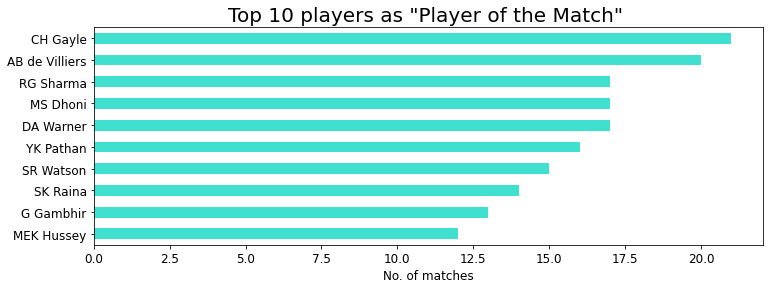

In [25]:
matches['player_of_match'].value_counts().sort_values(ascending=False).head(10).iloc[::-1].plot(kind='barh', figsize=(12,4), color='turquoise')
plt.title('Top 10 players as "Player of the Match" ', {'fontsize':20})
plt.xlabel('No. of matches')

count result

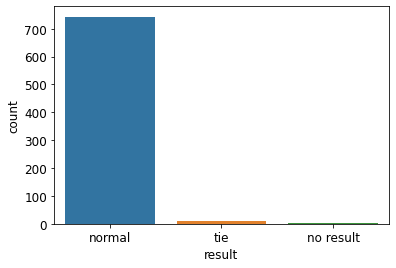

In [26]:
sns.countplot(matches['result'])

tosses won by winning team (toss winner)

# Toss decision & Winning matches

In [27]:
pd.options.display.max_rows = 20
winner=pd.DataFrame(matches['winner'].value_counts().sort_values(ascending = False))

In [28]:

toss_winner=pd.DataFrame(matches['toss_winner'].value_counts().sort_values(ascending = False))


In [29]:
winner.head()

,winner
Mumbai Indians,109
Chennai Super Kings,100
Kolkata Knight Riders,92
Sunrisers Hyderabad,87
Royal Challengers Bangalore,84


In [30]:
df=winner.join(toss_winner, how='left')
df=df.reset_index()
df=df.rename(columns={'index':'Teams','winner': 'Matches_won', 'toss_winner': 'Tosses_won'})

df=df.set_index('Teams')
df

,Matches_won,Tosses_won
Teams,,
Mumbai Indians,109,98
Chennai Super Kings,100,89
Kolkata Knight Riders,92,92
Sunrisers Hyderabad,87,89
Royal Challengers Bangalore,84,81
Kings XI Punjab,82,81
Delhi Capitals,77,90
Rajasthan Royals,75,80
Rising Pune Supergiant,27,33


Text(0.5, 0, 'No. of matches')

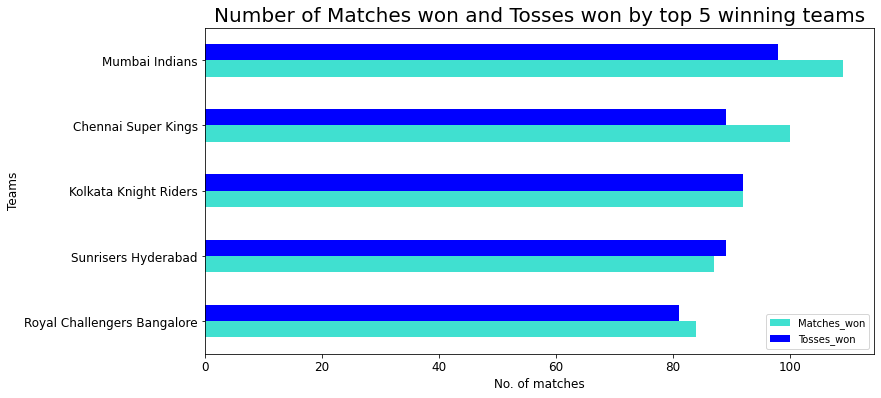

In [31]:
df.head(5).iloc[::-1].plot(kind='barh', figsize=(12,6), color=['turquoise','blue'])
plt.title('Number of Matches won and Tosses won by top 5 winning teams', {'fontsize':20})
plt.xlabel('No. of matches')

some of the top teams are sure to win a match if they win a toss

toss decissing by winning team winning max tosses from above (toss decision)

In [32]:
df.to_excel('matches&tosses.xlsx')

In [33]:
matches.groupby('winner')['toss_decision'].value_counts()

winner                       toss_decision
Chennai Super Kings          bat              52
                             field            48
Delhi Capitals               field            46
                             bat              31
Gujarat Lions                field            11
                                              ..
Rising Pune Supergiant       bat              11
Royal Challengers Bangalore  field            58
                             bat              26
Sunrisers Hyderabad          field            52
                             bat              35
Name: toss_decision, Length: 21, dtype: int64

In [34]:
matches.groupby(['winner','toss_decision'])['id'].count().unstack()

toss_decision,bat,field
winner,,
Chennai Super Kings,52.0,48.0
Delhi Capitals,31.0,46.0
Gujarat Lions,2.0,11.0
Kings XI Punjab,21.0,61.0
Kochi Tuskers Kerala,NaN,6.0
Kolkata Knight Riders,35.0,57.0
Mumbai Indians,45.0,64.0
Rajasthan Royals,34.0,41.0
Rising Pune Supergiant,11.0,16.0


In [35]:
df1=matches.groupby(['winner','toss_decision'])['id'].count().unstack()

In [36]:
df1.index

Index(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Lions',
       'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders',
       'Mumbai Indians', 'Rajasthan Royals', 'Rising Pune Supergiant',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'],
      dtype='object', name='winner')

In [37]:
df1=df1.reset_index()
df1

toss_decision,winner,bat,field
0,Chennai Super Kings,52.0,48.0
1,Delhi Capitals,31.0,46.0
2,Gujarat Lions,2.0,11.0
3,Kings XI Punjab,21.0,61.0
4,Kochi Tuskers Kerala,NaN,6.0
5,Kolkata Knight Riders,35.0,57.0
6,Mumbai Indians,45.0,64.0
7,Rajasthan Royals,34.0,41.0
8,Rising Pune Supergiant,11.0,16.0
9,Royal Challengers Bangalore,26.0,58.0


In [38]:
type(df1)

pandas.core.frame.DataFrame

In [39]:
df3=pd.merge(df,df1,left_on='Teams', right_on ='winner', how='left' )
#df3=df3.drop('winner', axis=1)
df3=df3.rename(columns={'winner': 'Teams','bat':'Bat_decision','field': 'field_decision'})

df3=df3.set_index('Teams')
df3

,Matches_won,Tosses_won,Bat_decision,field_decision
Teams,,,,
Mumbai Indians,109,98,45.0,64.0
Chennai Super Kings,100,89,52.0,48.0
Kolkata Knight Riders,92,92,35.0,57.0
Sunrisers Hyderabad,87,89,35.0,52.0
Royal Challengers Bangalore,84,81,26.0,58.0
Kings XI Punjab,82,81,21.0,61.0
Delhi Capitals,77,90,31.0,46.0
Rajasthan Royals,75,80,34.0,41.0
Rising Pune Supergiant,27,33,11.0,16.0


Text(0.5, 1.0, 'Toss decisions of IPL teams')

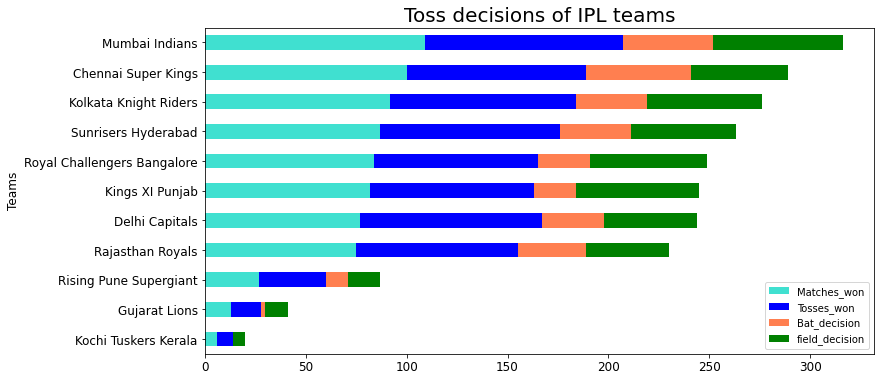

In [40]:
#df3.plot(kind='bar', figsize=(12,6))
df3.iloc[::-1].plot(kind='barh', figsize=(12,6), stacked=True, color=['turquoise','blue','coral', 'green'])
plt.title('Toss decisions of IPL teams', {'fontsize':20})

In [41]:
df3.to_excel('total.xlsx')

In [42]:
matches.groupby('winner')['toss_winner'].count().sort_values(ascending= False).head(10)

winner
Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiant          27
Gujarat Lions                   13
Name: toss_winner, dtype: int64

toss decissing by winning team winning max tosses from above (toss decision)

max winning teams win by runs and win by wickets

In [43]:
df1=matches.groupby('winner')[['win_by_runs', 'win_by_wickets']].mean()
df1

,win_by_runs,win_by_wickets
winner,,
Chennai Super Kings,17.780000,2.890000
Delhi Capitals,9.961039,3.948052
Gujarat Lions,0.076923,5.000000
Kings XI Punjab,11.280488,3.268293
Kochi Tuskers Kerala,3.833333,5.000000
Kolkata Knight Riders,11.804348,3.815217
Mumbai Indians,17.119266,2.816514
Rajasthan Royals,11.933333,3.640000
Rising Pune Supergiant,11.666667,3.222222


In [44]:
df1=df1.reset_index()

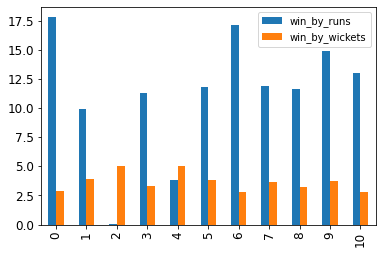

In [45]:
df1.plot(kind='bar')

In [46]:
df4=pd.merge(df3,df1,left_on='teams', right_on ='winner', how='left' )
df4=df4.drop('winner', axis=1)
df4

KeyError: 'teams'

In [47]:
df4=df4.head(10)

NameError: name 'df4' is not defined

In [48]:
df4.plot(kind='bar', figsize=(18,6))

NameError: name 'df4' is not defined

max winning teams payer of the match

In [49]:
df=matches.groupby('winner')['player_of_match'].value_counts()

In [50]:
df

winner               player_of_match
Chennai Super Kings  MS Dhoni           15
                     SK Raina           12
                     MEK Hussey         10
                     RA Jadeja           8
                     M Vijay             5
                                        ..
Sunrisers Hyderabad  S Sohal             1
                     TA Boult            1
                     TL Suman            1
                     WPUJC Vaas          1
                     Yuvraj Singh        1
Name: player_of_match, Length: 316, dtype: int64

In [51]:
pd.options.display.max_rows = 100

In [52]:
df1=pd.DataFrame(df)


In [53]:
df1

player_of_match
winner              player_of_match                 
Chennai Super Kings MS Dhoni                      15
                    SK Raina                      12
                    MEK Hussey                    10
                    RA Jadeja                      8
                    M Vijay                        5
...                                              ...
Sunrisers Hyderabad S Sohal                        1
                    TA Boult                       1
                    TL Suman                       1
                    WPUJC Vaas                     1
                    Yuvraj Singh                   1

[316 rows x 1 columns]

In [54]:
df1=df1.rename(columns={'player_of_match': 'no_matches'})

In [55]:
df1.to_excel('player_of_match.xlsx')

In [56]:
win_by_runs=matches.groupby(['winner', 'season'])['win_by_runs'].mean()
win_by_runs

winner                       season
Chennai Super Kings          2008       8.111111
                             2009      32.750000
                             2010      18.000000
                             2011      19.727273
                             2012      22.100000
                             2013      25.833333
                             2014      13.400000
                             2015      20.800000
                             2018       7.363636
                             2019      11.000000
Delhi Capitals               2008       3.142857
                             2009       3.500000
                             2010      23.000000
                             2011      16.750000
                             2012       3.454545
                             2013       5.000000
                             2014       0.000000
                             2015       8.200000
                             2016       5.285714
                             2017

In [57]:
win_by_runs= win_by_runs.reset_index()
win_by_runs

,winner,season,win_by_runs
0,Chennai Super Kings,2008,8.111111
1,Chennai Super Kings,2009,32.750000
2,Chennai Super Kings,2010,18.000000
3,Chennai Super Kings,2011,19.727273
4,Chennai Super Kings,2012,22.100000
5,Chennai Super Kings,2013,25.833333
6,Chennai Super Kings,2014,13.400000
7,Chennai Super Kings,2015,20.800000
8,Chennai Super Kings,2018,7.363636
9,Chennai Super Kings,2019,11.000000


In [58]:
win_by_runs_tot=matches.groupby([ 'season'])['win_by_runs'].mean()

In [59]:
win_by_runs_tot

season
2008    12.155172
2009    13.403509
2010    16.266667
2011    15.041096
2012    12.972973
2013    16.328947
2014    10.733333
2015    14.406780
2016    11.266667
2017    13.355932
2018    11.250000
2019    11.083333
Name: win_by_runs, dtype: float64

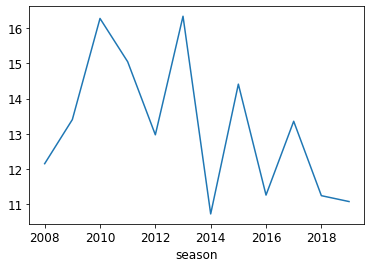

In [60]:
win_by_runs_tot.plot(kind='line')

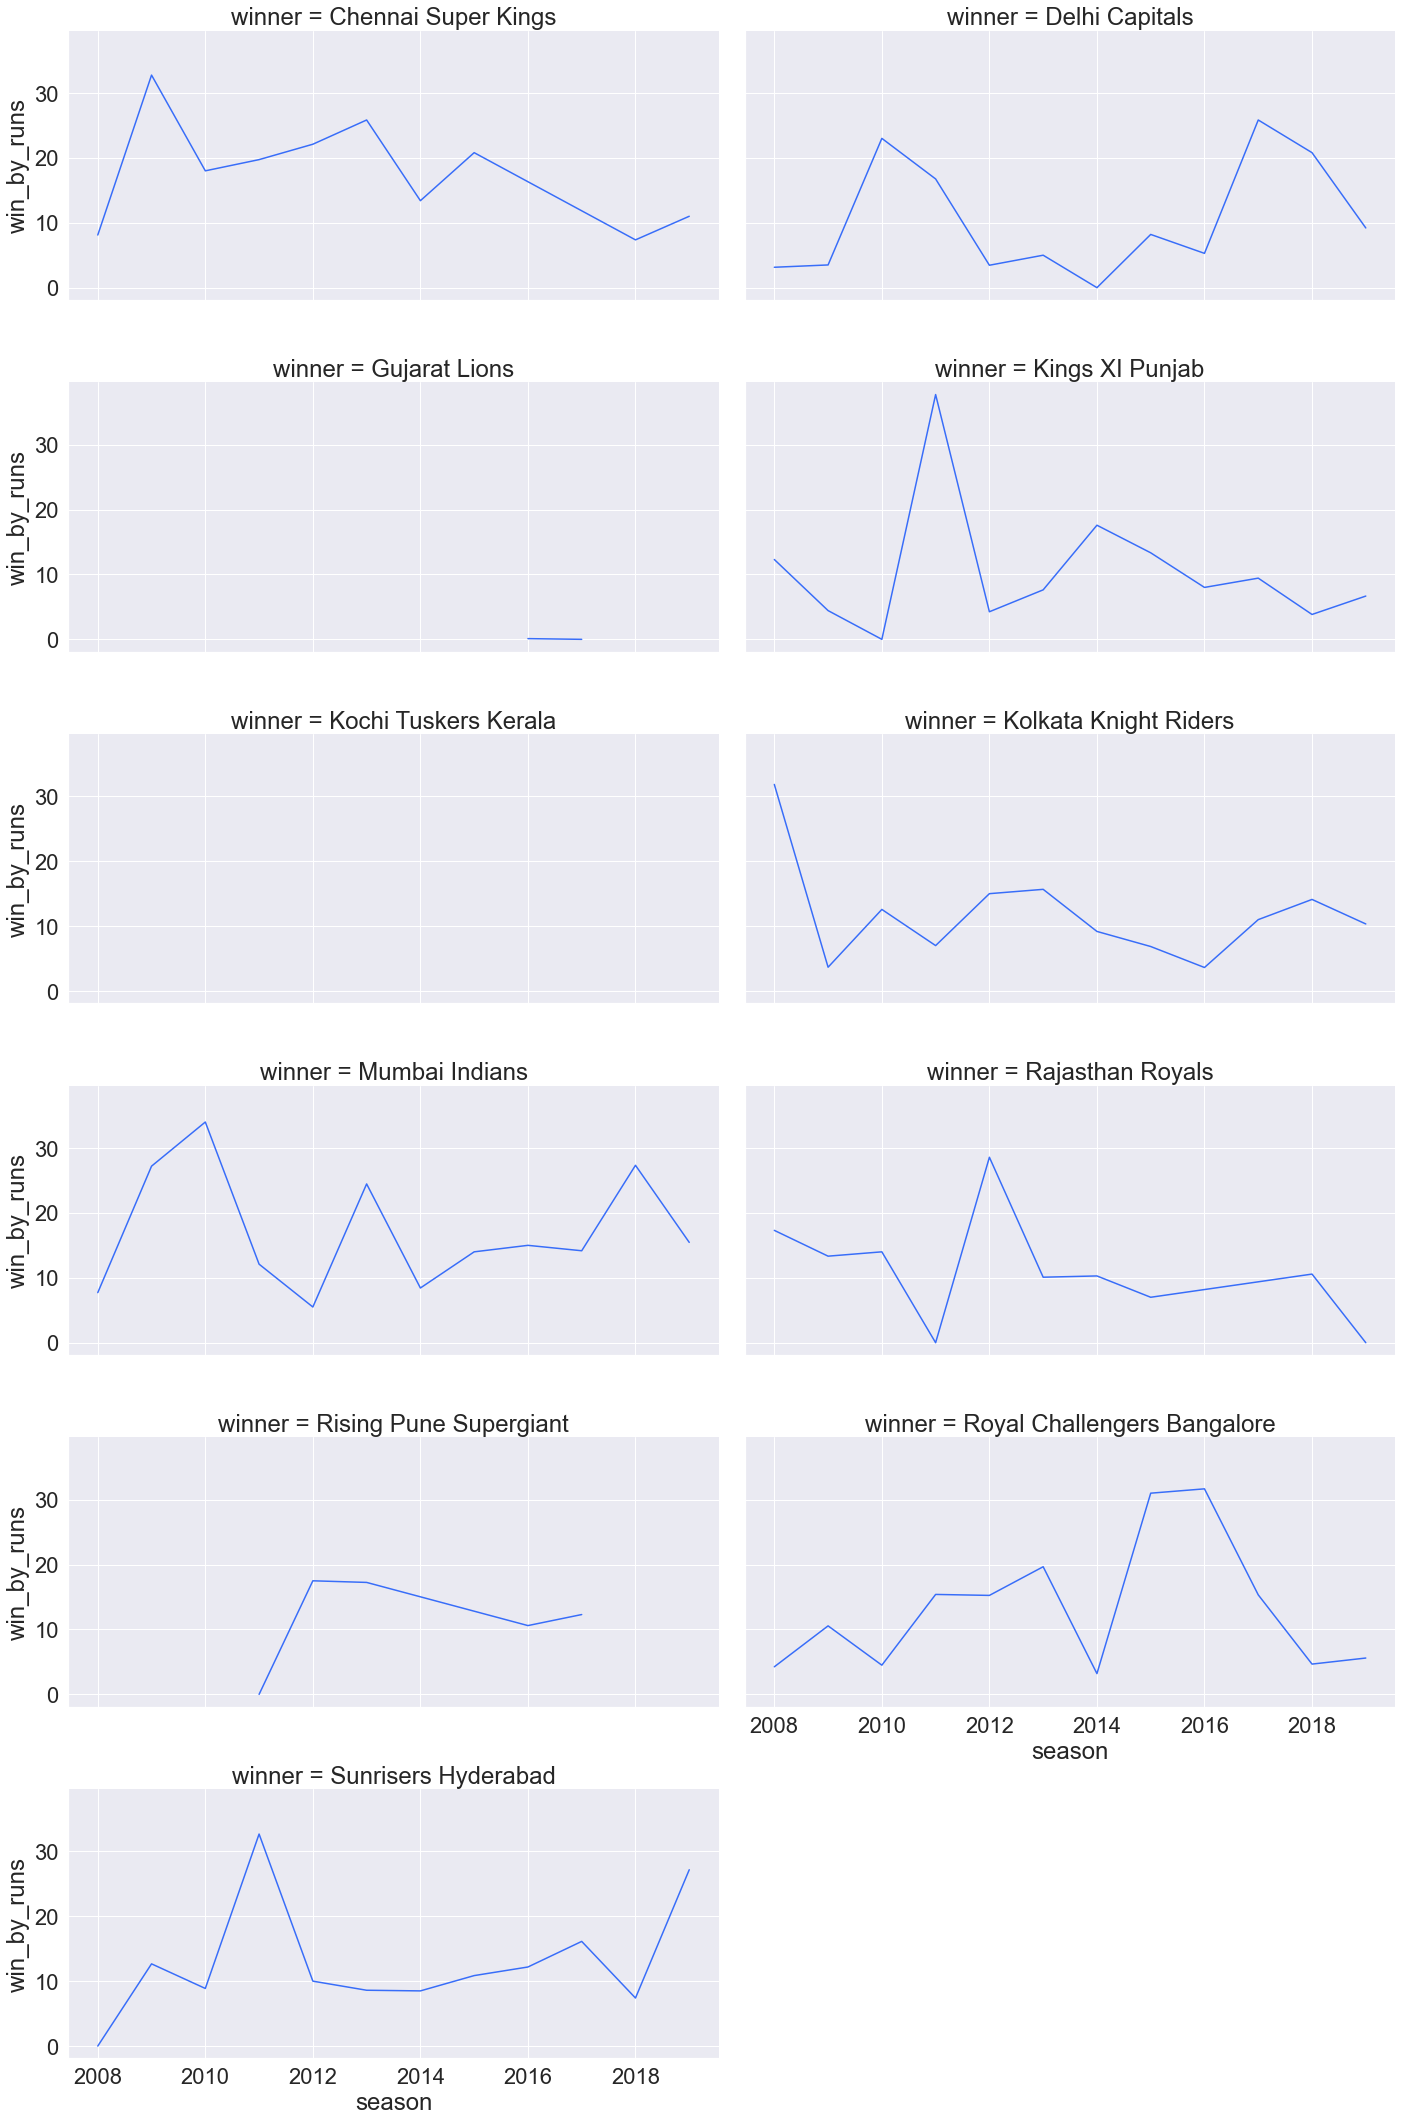

In [61]:
sns.set(context='notebook',
    style='darkgrid',
    palette='rainbow',font_scale=2)  
g = sns.FacetGrid(win_by_runs, col='winner', col_wrap=2, sharey=True, height=5, aspect=2 )
g.map(sns.lineplot, 'season', 'win_by_runs')
# reduce aspect to get sharp and clear individual plots

In [62]:
win_by_wickets=matches.groupby(['winner', 'season'])['win_by_wickets'].mean()
win_by_wickets= win_by_wickets.reset_index()
win_by_wickets

,winner,season,win_by_wickets
0,Chennai Super Kings,2008,3.222222
1,Chennai Super Kings,2009,1.750000
2,Chennai Super Kings,2010,2.777778
3,Chennai Super Kings,2011,2.000000
4,Chennai Super Kings,2012,3.000000
5,Chennai Super Kings,2013,2.333333
6,Chennai Super Kings,2014,4.400000
7,Chennai Super Kings,2015,1.600000
8,Chennai Super Kings,2018,3.636364
9,Chennai Super Kings,2019,4.100000


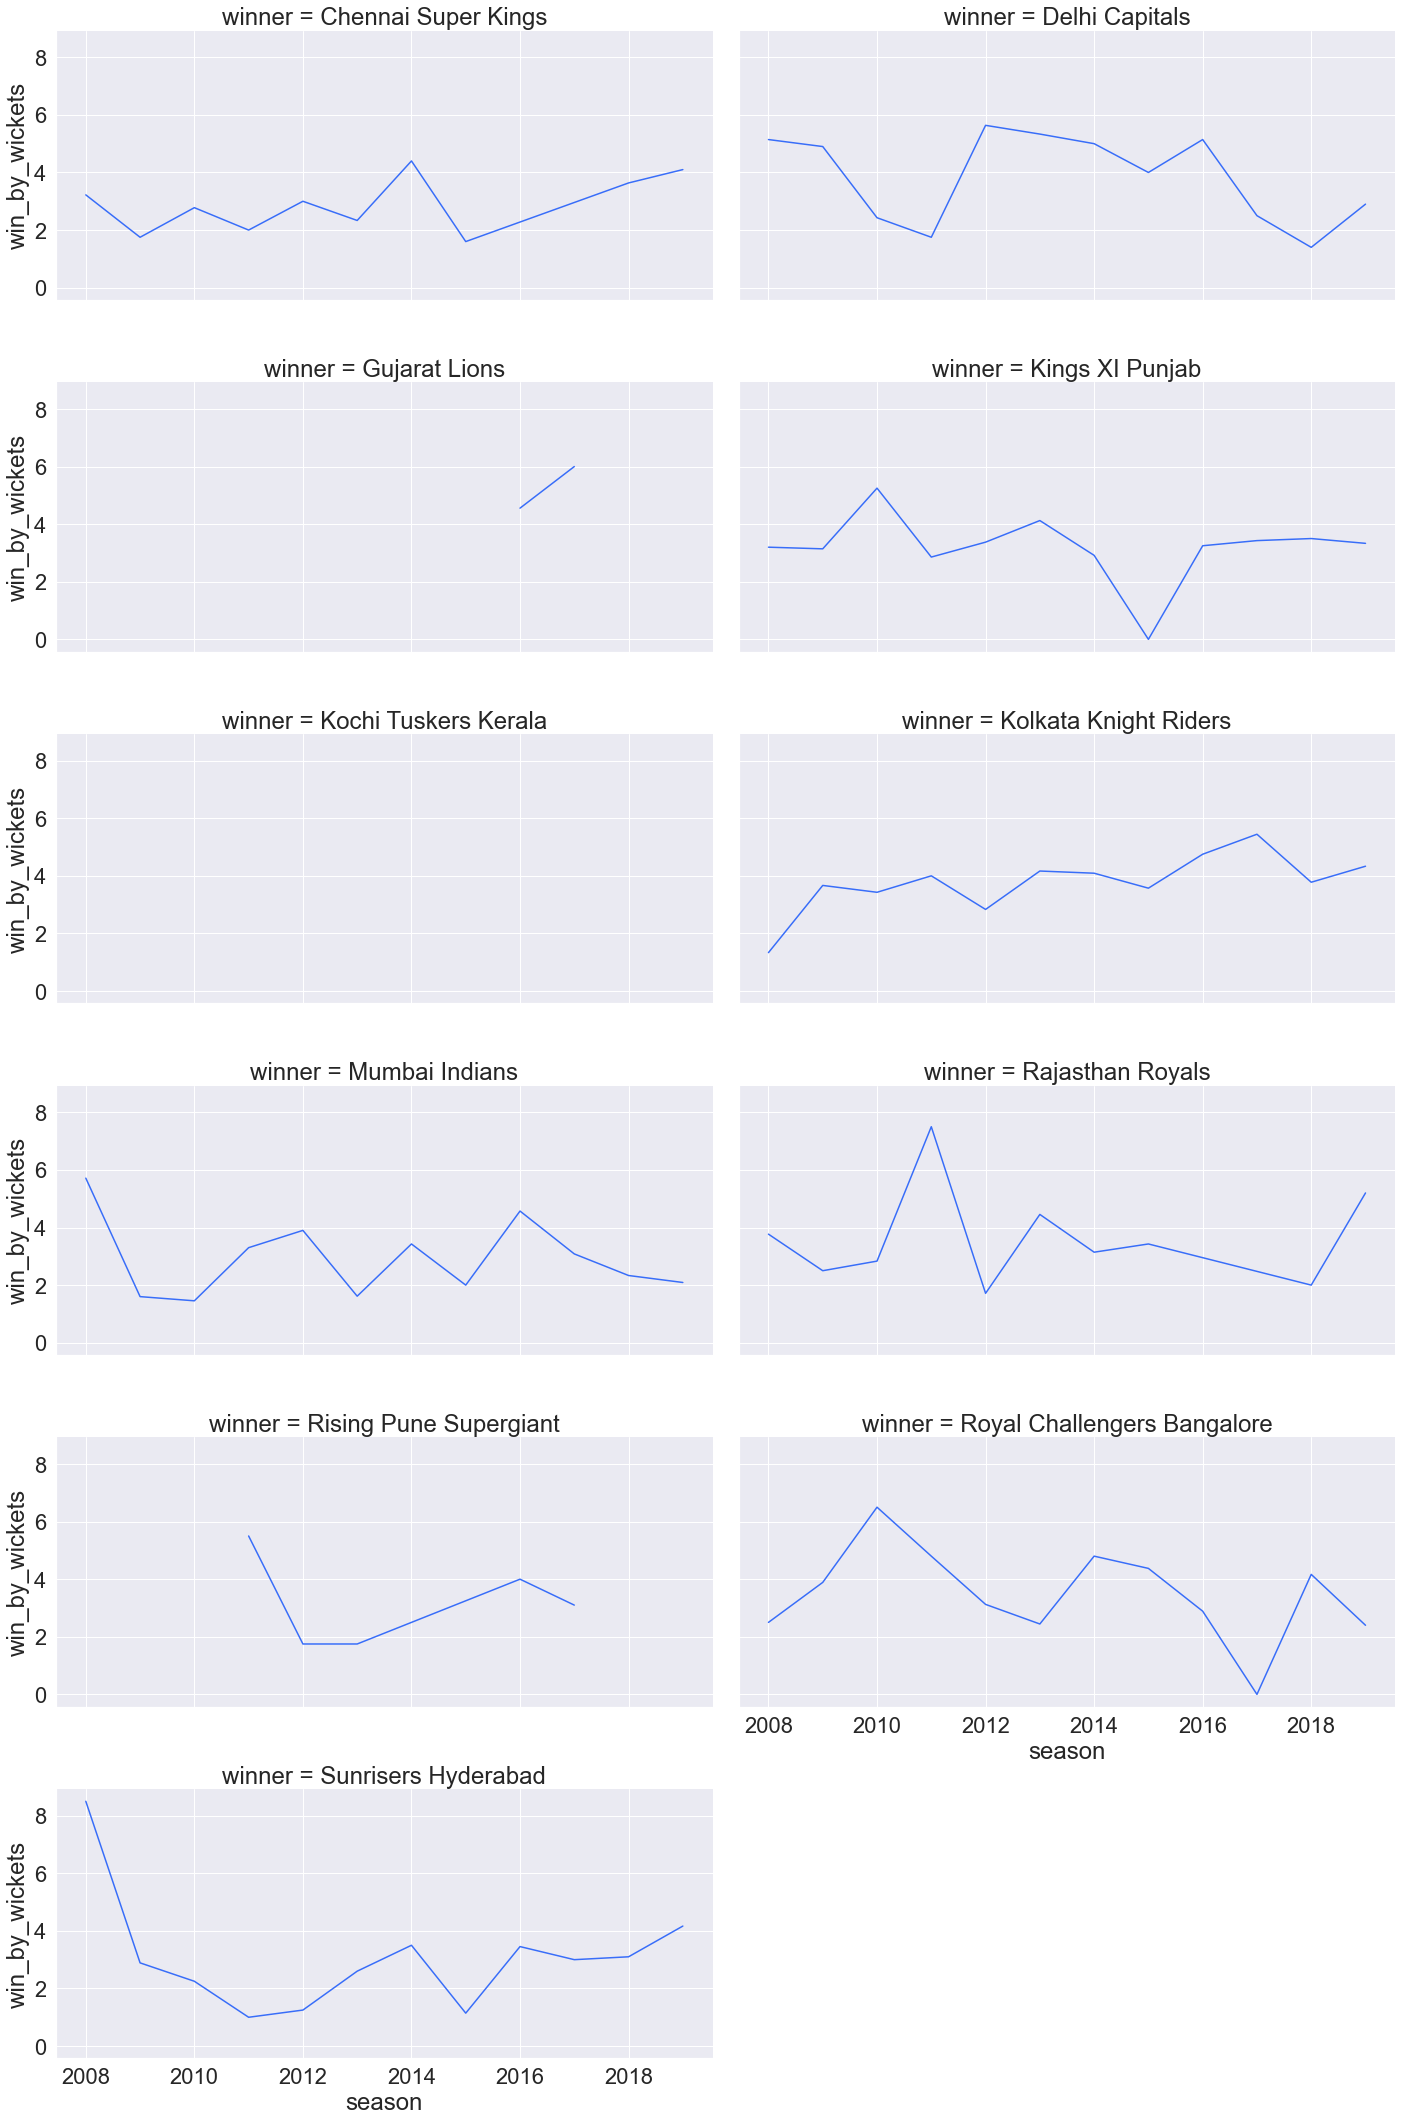

In [63]:
sns.set(context='notebook',
    style='darkgrid',
    palette='rainbow',font_scale=2)  
g = sns.FacetGrid(win_by_wickets, col='winner', col_wrap=2, sharey=True, height=5, aspect=2 )
g.map(sns.lineplot, 'season', 'win_by_wickets')
# reduce aspect to get sharp and clear individual plots

In [64]:
df=pd.read_excel('deliveries.xlsx')

In [65]:
df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,0,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,0,0,0,1,0,0,1,1,NaN,NaN,NaN


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [67]:
for col in df.columns:
    print(col, df[col].nunique())

match_id 756
inning 5
batting_team 15
bowling_team 15
over 20
ball 9
batsman 516
non_striker 511
bowler 405
is_super_over 2
wide_runs 6
bye_runs 5
legbye_runs 6
noball_runs 5
penalty_runs 2
batsman_runs 8
extra_runs 7
total_runs 10
player_dismissed 487
dismissal_kind 9
fielder 499


In [68]:
for col in df.columns:
    if df[col].nunique()<=16:
        print(col, df[col].unique())

inning [1 2 3 4 5]
batting_team ['Sunrisers Hyderabad' 'Royal Challengers Bangalore' 'Mumbai Indians'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Kolkata Knight Riders'
 'Kings XI Punjab' 'Delhi Daredevils' 'Chennai Super Kings'
 'Rajasthan Royals' 'Deccan Chargers' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Rising Pune Supergiants' 'Delhi Capitals']
bowling_team ['Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Rising Pune Supergiant' 'Mumbai Indians' 'Kolkata Knight Riders'
 'Gujarat Lions' 'Kings XI Punjab' 'Delhi Daredevils'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']
ball [1 2 3 4 5 6 7 8 9]
is_super_over [0 1]
wide_runs [0 2 1 5 3 4]
bye_runs [0 1 4 2 3]
legbye_runs [0 1 2 5 3 4]
noball_runs [0 1 2 5 3]
penalty_runs [0 5]
batsman_runs [0 4 1 6 3 2 5 7]
extra_runs [0 2 1 4 5 3 7]
total_runs [ 0  4  2  1  6  3  5  7 10  8]
dismissal_kind [nan 'caught' 'bowled' 'run out' 'lbw' 'cau

In [69]:
# for sort_values no need to mention by=  , in this situation
df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False).head(10)

batting_team
Mumbai Indians                 29809
Royal Challengers Bangalore    28126
Kings XI Punjab                27893
Kolkata Knight Riders          27419
Chennai Super Kings            26418
Delhi Daredevils               24388
Rajasthan Royals               22431
Sunrisers Hyderabad            17059
Deccan Chargers                11463
Pune Warriors                   6358
Name: total_runs, dtype: int64

In [70]:
# top teams with highest runs

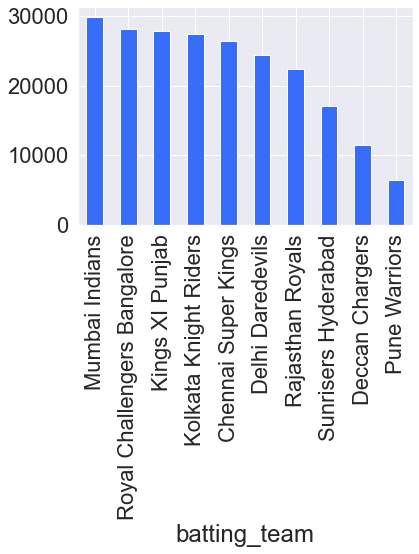

In [71]:
df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

In [72]:
df.groupby('batting_team')['dismissal_kind'].count().sort_values(ascending=False).head(10)

batting_team
Mumbai Indians                 1117
Kings XI Punjab                1081
Royal Challengers Bangalore    1035
Kolkata Knight Riders          1012
Delhi Daredevils                951
Rajasthan Royals                865
Chennai Super Kings             852
Sunrisers Hyderabad             601
Deccan Chargers                 484
Pune Warriors                   298
Name: dismissal_kind, dtype: int64

In [73]:
# top 10 teams with hichest wickets

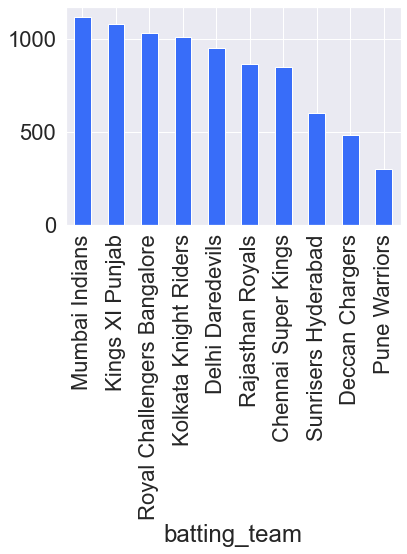

In [74]:
df.groupby('batting_team')['dismissal_kind'].count().sort_values(ascending=False).head(10).plot(kind='bar')

In [75]:
# checking that nan is not counted
df[df['batting_team']=='Chennai Super Kings']['dismissal_kind'].value_counts()

caught               531
bowled               131
run out               84
lbw                   50
stumped               31
caught and bowled     24
hit wicket             1
Name: dismissal_kind, dtype: int64

In [76]:
#checking that nan is not counted
df[df['batting_team']=='Chennai Super Kings']['dismissal_kind'].count()

852

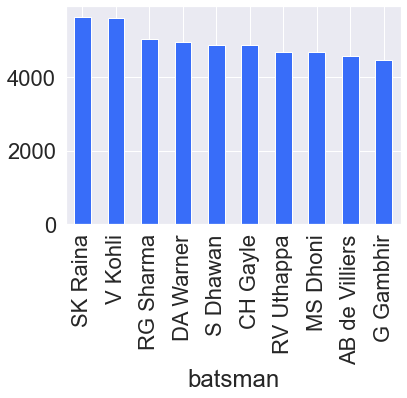

In [77]:
# top 10 batsman on total runs
df.groupby('batsman')['total_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

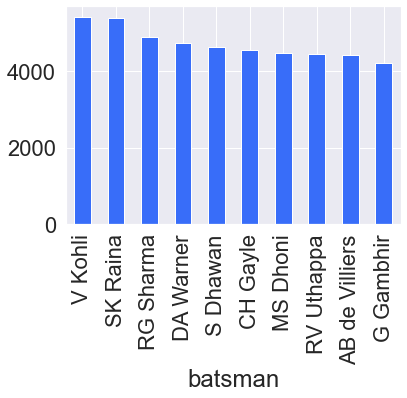

In [78]:
# top 10 batsman on batsman runs
df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

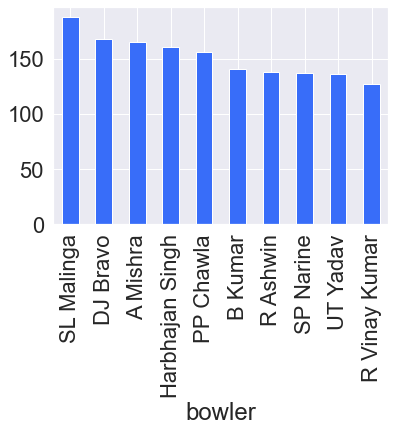

In [79]:
# top 10 bowler with highest wickets 
df.groupby('bowler')['dismissal_kind'].count().sort_values(ascending=False).head(10).plot(kind='bar')

In [80]:
#fastest 50 

In [81]:
df.groupby(['match_id', 'batsman'])['total_runs'].sum()

match_id  batsman    
1         A Choudhary     6
          BCJ Cutting    16
          CH Gayle       34
          DA Warner      17
          DJ Hooda       16
                         ..
11415     RD Chahar       0
          RG Sharma      15
          SK Raina       10
          SN Thakur       2
          SR Watson      88
Name: total_runs, Length: 11294, dtype: int64

In [82]:
df.groupby(['match_id', 'batsman'])['ball'].count()

match_id  batsman    
1         A Choudhary     2
          BCJ Cutting     6
          CH Gayle       23
          DA Warner       9
          DJ Hooda       12
                         ..
11415     RD Chahar       2
          RG Sharma      14
          SK Raina       15
          SN Thakur       2
          SR Watson      62
Name: ball, Length: 11294, dtype: int64

In [83]:
total_runs=df.groupby(['match_id', 'batsman'])['total_runs'].sum().reset_index()
balls=df.groupby(['match_id', 'batsman'])['ball'].count().reset_index()

In [84]:
balls

,match_id,batsman,ball
0,1,A Choudhary,2
1,1,BCJ Cutting,6
2,1,CH Gayle,23
3,1,DA Warner,9
4,1,DJ Hooda,12
...,...,...,...
11289,11415,RD Chahar,2
11290,11415,RG Sharma,14
11291,11415,SK Raina,15
11292,11415,SN Thakur,2


In [85]:
total=pd.concat([total_runs, balls], axis=1)

In [86]:
total

,match_id,batsman,total_runs,match_id,batsman,ball
0,1,A Choudhary,6,1,A Choudhary,2
1,1,BCJ Cutting,16,1,BCJ Cutting,6
2,1,CH Gayle,34,1,CH Gayle,23
3,1,DA Warner,17,1,DA Warner,9
4,1,DJ Hooda,16,1,DJ Hooda,12
...,...,...,...,...,...,...
11289,11415,RD Chahar,0,11415,RD Chahar,2
11290,11415,RG Sharma,15,11415,RG Sharma,14
11291,11415,SK Raina,10,11415,SK Raina,15
11292,11415,SN Thakur,2,11415,SN Thakur,2


In [87]:

df.groupby(['match_id', 'batsman'])['total_runs'].agg(['sum', 'count']).reset_index()

,match_id,batsman,sum,count
0,1,A Choudhary,6,2
1,1,BCJ Cutting,16,6
2,1,CH Gayle,34,23
3,1,DA Warner,17,9
4,1,DJ Hooda,16,12
...,...,...,...,...
11289,11415,RD Chahar,0,2
11290,11415,RG Sharma,15,14
11291,11415,SK Raina,10,15
11292,11415,SN Thakur,2,2


In [88]:
df2=df.groupby(['match_id', 'batsman'])['total_runs'].agg(['sum', 'count']).reset_index()

In [89]:
7

7

In [90]:
df2

,match_id,batsman,sum,count
0,1,A Choudhary,6,2
1,1,BCJ Cutting,16,6
2,1,CH Gayle,34,23
3,1,DA Warner,17,9
4,1,DJ Hooda,16,12
...,...,...,...,...
11289,11415,RD Chahar,0,2
11290,11415,RG Sharma,15,14
11291,11415,SK Raina,10,15
11292,11415,SN Thakur,2,2


In [91]:
df3=df2[(df2['sum']>=50) & (df2['sum']<60)]
df3

,match_id,batsman,sum,count
6,1,MC Henriques,52,37
40,4,BA Stokes,53,34
79,6,MC Henriques,53,40
92,7,N Rana,52,30
128,10,DA Warner,52,34
...,...,...,...,...
11218,11346,SK Raina,53,38
11227,11347,RG Sharma,57,49
11228,11347,RV Uthappa,52,52
11253,11413,RR Pant,51,22


In [92]:
df3.loc[:,'cal']=df3['sum']/df3['count']
df3

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,match_id,batsman,sum,count,cal
6,1,MC Henriques,52,37,1.405405
40,4,BA Stokes,53,34,1.558824
79,6,MC Henriques,53,40,1.325000
92,7,N Rana,52,30,1.733333
128,10,DA Warner,52,34,1.529412
...,...,...,...,...,...
11218,11346,SK Raina,53,38,1.394737
11227,11347,RG Sharma,57,49,1.163265
11228,11347,RV Uthappa,52,52,1.000000
11253,11413,RR Pant,51,22,2.318182


In [93]:
df3=df3.sort_values(by='cal', ascending=False)
df3

,match_id,batsman,sum,count,cal
10660,11153,AD Russell,56,16,3.500000
9538,7895,KL Rahul,51,16,3.187500
680,45,SP Narine,56,19,2.947368
10496,11142,AD Russell,50,17,2.941176
3025,199,Harbhajan Singh,51,18,2.833333
...,...,...,...,...,...
5890,391,M Vijay,52,52,1.000000
7501,499,CH Gayle,52,52,1.000000
11228,11347,RV Uthappa,52,52,1.000000
3623,238,SR Tendulkar,53,55,0.963636


In [94]:
df3.loc[:,'cal']=df3['sum']/df3['count']
df3

,match_id,batsman,sum,count,cal
10660,11153,AD Russell,56,16,3.500000
9538,7895,KL Rahul,51,16,3.187500
680,45,SP Narine,56,19,2.947368
10496,11142,AD Russell,50,17,2.941176
3025,199,Harbhajan Singh,51,18,2.833333
...,...,...,...,...,...
5890,391,M Vijay,52,52,1.000000
7501,499,CH Gayle,52,52,1.000000
11228,11347,RV Uthappa,52,52,1.000000
3623,238,SR Tendulkar,53,55,0.963636


In [95]:
fastest_50_per_match=df3.groupby(['match_id', 'batsman'])['cal'].max().reset_index().drop('cal', axis=1)
fastest_50_per_match

,match_id,batsman
0,1,MC Henriques
1,4,BA Stokes
2,6,MC Henriques
3,7,N Rana
4,10,DA Warner
...,...,...
490,11346,SK Raina
491,11347,RG Sharma
492,11347,RV Uthappa
493,11413,RR Pant


In [96]:
fastest_50_per_match.groupby('batsman').count().sort_values(by='match_id',ascending=False).head(20)
                                                                                            

,match_id
batsman,
S Dhawan,21
DA Warner,16
SK Raina,15
RG Sharma,15
KD Karthik,13
V Kohli,13
AB de Villiers,11
RV Uthappa,11
G Gambhir,10


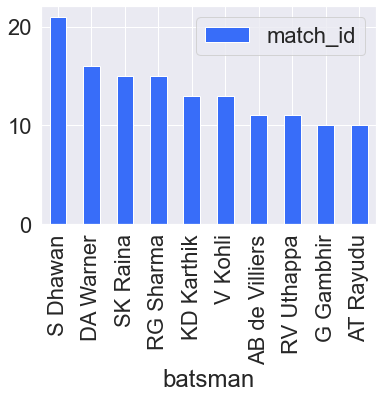

In [97]:
#players with highest number of 50s 
fastest_50_per_match.groupby('batsman').count().sort_values(by='match_id',ascending=False).head(10).plot(kind='bar')

In [98]:
# fastest 100

df3=df2[(df2['sum']>=50)]
df3

,match_id,batsman,sum,count
6,1,MC Henriques,52,37
16,1,Yuvraj Singh,65,30
17,2,AM Rahane,60,34
29,2,SPD Smith,85,55
33,3,CA Lynn,102,46
...,...,...,...,...
11252,11413,P Shaw,62,40
11253,11413,RR Pant,51,22
11265,11414,F du Plessis,50,39
11274,11414,SR Watson,62,34


In [99]:
#Reset index converts into non-indexed datafarame
df2=df.groupby(['match_id', 'batsman'])['total_runs'].agg(['sum', 'count']).reset_index()
# reduce df
df3=df2[(df2['sum']>=50)]
# calculating for fastest 50
df3.loc[:,'cal']=df3['sum']/df3['count']
df3=df3.sort_values(by='cal', ascending=False)
#reduce df
df3=df3[(df3['cal']>=2)]
# fastest scorer per match- gies the batsman details but does not show balls and runs
fastest_50_per_match=df3.groupby(['match_id', 'batsman'])['cal'].max().reset_index().drop('cal', axis=1)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [100]:
df3.loc[:,'cal']=df3['sum']/df3['count']
df3

,match_id,batsman,sum,count,cal
10660,11153,AD Russell,56,16,3.500000
7751,516,SK Raina,89,26,3.423077
7676,511,YK Pathan,72,22,3.272727
9538,7895,KL Rahul,51,16,3.187500
11093,11338,HH Pandya,101,34,2.970588
...,...,...,...,...,...
6352,421,RG Sharma,80,40,2.000000
10648,11152,J Bairstow,58,29,2.000000
6395,425,DA Miller,52,26,2.000000
1388,92,DJ Hussey,58,29,2.000000


In [101]:
df3=df3.sort_values(by='cal', ascending=False)
df3

,match_id,batsman,sum,count,cal
10660,11153,AD Russell,56,16,3.500000
7751,516,SK Raina,89,26,3.423077
7676,511,YK Pathan,72,22,3.272727
9538,7895,KL Rahul,51,16,3.187500
11093,11338,HH Pandya,101,34,2.970588
...,...,...,...,...,...
467,32,KS Williamson,54,27,2.000000
8358,557,CH Gayle,126,63,2.000000
292,20,CH Gayle,80,40,2.000000
7607,507,DA Warner,92,46,2.000000


In [102]:
df3.head(100)

,match_id,batsman,sum,count,cal
10660,11153,AD Russell,56,16,3.500000
7751,516,SK Raina,89,26,3.423077
7676,511,YK Pathan,72,22,3.272727
9538,7895,KL Rahul,51,16,3.187500
11093,11338,HH Pandya,101,34,2.970588
680,45,SP Narine,56,19,2.947368
10496,11142,AD Russell,50,17,2.941176
10461,11139,RR Pant,82,28,2.928571
10131,7934,Ishan Kishan,64,22,2.909091
3025,199,Harbhajan Singh,51,18,2.833333


In [103]:
df3['match_id'].nunique()

152

In [104]:
len(df3[(df3['cal']>=2)])

178

In [105]:
df3=df3[(df3['cal']>=2)]

In [106]:
fastest_50_per_match=df3.groupby(['match_id', 'batsman'])['cal'].max().reset_index().drop('cal', axis=1)
fastest_50_per_match

,match_id,batsman
0,1,Yuvraj Singh
1,3,CA Lynn
2,20,CH Gayle
3,22,JC Buttler
4,25,MC Henriques
...,...,...
173,11338,AD Russell
174,11338,HH Pandya
175,11343,S Curran
176,11346,KL Rahul


In [107]:
fastest_50_per_match=df3.groupby(['match_id', 'batsman'])['sum', 'count'].agg({'cal': 'max'}).reset_index().drop('cal', axis=1)
fastest_50_per_match

<ipython-input-107-742ca2e8994d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fastest_50_per_match=df3.groupby(['match_id', 'batsman'])['sum', 'count'].agg({'cal': 'max'}).reset_index().drop('cal', axis=1)


SpecificationError: nested renamer is not supported

In [108]:
#players with highest number of 50s and 100s

In [109]:
#highest wicket takers in a single match

In [110]:
deliveries.head()

NameError: name 'deliveries' is not defined

In [111]:
df1=df.groupby(['match_id', 'batsman'])['total_runs'].agg(['sum', 'count'])
df1

sum  count
match_id batsman                
1        A Choudhary    6      2
         BCJ Cutting   16      6
         CH Gayle      34     23
         DA Warner     17      9
         DJ Hooda      16     12
...                   ...    ...
11415    RD Chahar      0      2
         RG Sharma     15     14
         SK Raina      10     15
         SN Thakur      2      2
         SR Watson     88     62

[11294 rows x 2 columns]

In [112]:

df1=df1.reset_index()
df1
#df1=df1.rename(columns={'batsman': 'no of balls'})

,match_id,batsman,sum,count
0,1,A Choudhary,6,2
1,1,BCJ Cutting,16,6
2,1,CH Gayle,34,23
3,1,DA Warner,17,9
4,1,DJ Hooda,16,12
...,...,...,...,...
11289,11415,RD Chahar,0,2
11290,11415,RG Sharma,15,14
11291,11415,SK Raina,10,15
11292,11415,SN Thakur,2,2


In [113]:
df1=df1.rename(columns={'sum': 'runs', 'count': 'number of balls'})

In [114]:
df2=df1.groupby('batsman')['runs'].mean().reset_index()
df2=df2.sort_values(by='runs', ascending=False)

In [115]:
df2.head(10)

,batsman,runs
180,J Bairstow,48.700000
112,DA Warner,39.484127
92,CH Gayle,39.298387
244,LMP Simmons,38.862069
426,SE Marsh,37.855072
282,ML Hayden,37.656250
164,HM Amla,37.500000
223,KL Rahul,35.982759
352,R Parag,35.600000
273,MEK Hussey,35.586207


In [116]:
df2=df2.set_index('batsman')

Text(0.5, 0, 'No. of matches')

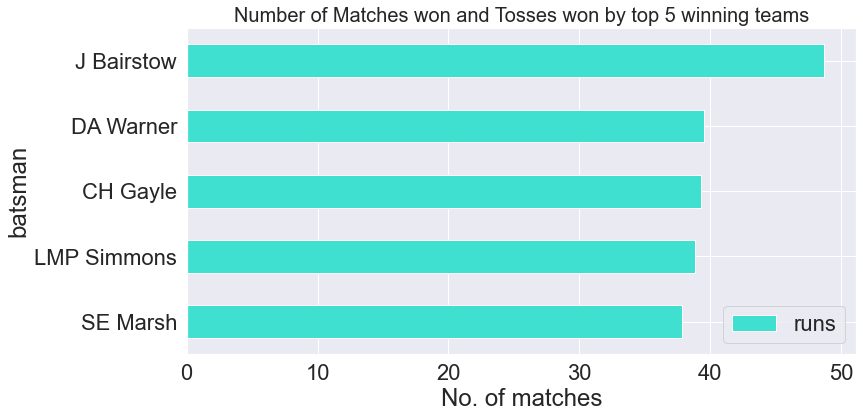

In [117]:

df2.head(5).iloc[::-1].plot(kind='barh', figsize=(12,6), color=['turquoise','blue'])
plt.title('Number of Matches won and Tosses won by top 5 winning teams', {'fontsize':20})
plt.xlabel('No. of matches')

In [118]:
batsman=df2.head(10)['batsman'].to_list()
batsman

KeyError: 'batsman'

In [119]:
df3=df.groupby(['batsman','batsman_runs'])['batsman_runs'].count()
df3

batsman         batsman_runs
A Ashish Reddy  0               61
                1               83
                2               20
                3                1
                4               16
                                ..
Z Khan          0               74
                1               47
                2                7
                4               11
                6                2
Name: batsman_runs, Length: 2394, dtype: int64

In [120]:
df3.index

MultiIndex([('A Ashish Reddy', 0),
            ('A Ashish Reddy', 1),
            ('A Ashish Reddy', 2),
            ('A Ashish Reddy', 3),
            ('A Ashish Reddy', 4),
            ('A Ashish Reddy', 6),
            (    'A Chandila', 0),
            (    'A Chandila', 1),
            (      'A Chopra', 0),
            (      'A Chopra', 1),
            ...
            (  'Yuvraj Singh', 1),
            (  'Yuvraj Singh', 2),
            (  'Yuvraj Singh', 3),
            (  'Yuvraj Singh', 4),
            (  'Yuvraj Singh', 6),
            (        'Z Khan', 0),
            (        'Z Khan', 1),
            (        'Z Khan', 2),
            (        'Z Khan', 4),
            (        'Z Khan', 6)],
           names=['batsman', 'batsman_runs'], length=2394)

In [121]:
df3.loc['A Ashish Reddy']

batsman_runs
0    61
1    83
2    20
3     1
4    16
6    15
Name: batsman_runs, dtype: int64

In [122]:
labels=df3.loc['A Ashish Reddy'].index

In [123]:
for name in batsman:
    labels=df3.loc[name].index
    fig = plt.figure(figsize =(10, 7))
    plt.pie(df3.loc[name], labels=labels, shadow=True, startangle=90, autopct='%.0f%%' )
  

NameError: name 'batsman' is not defined

In [124]:
df3.reset_index()


ValueError: cannot insert batsman_runs, already exists

In [125]:
df3=df.groupby(['batsman','batsman_runs'])['batsman_runs'].count().reset_index()

ValueError: cannot insert batsman_runs, already exists

In [126]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month,day
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017,4,5
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017,4,6
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017,4,7
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017,4,8
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017,4,8


In [127]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [128]:
df1=df.groupby('match_id')['total_runs'].sum().reset_index()
df1

,match_id,total_runs
0,1,379
1,2,371
2,3,367
3,4,327
4,5,299
...,...,...
751,11347,280
752,11412,276
753,11413,341
754,11414,317


In [129]:
matches=matches.merge( df1, left_on='id', right_on='match_id', how='left')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,year,month,day,match_id,total_runs
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2017,4,5,1,379
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2017,4,6,2,371
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,2017,4,7,3,367
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,2017,4,8,4,327
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,2017,4,8,5,299


In [130]:
matches=matches.rename(columns={'total_runs_x': 'Total_runs'})

KeyError: 'Total_runs'

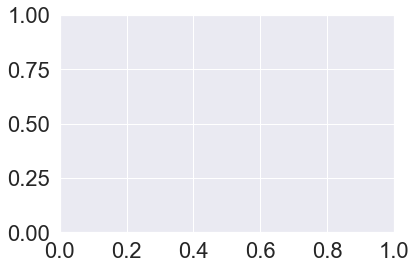

In [131]:
ax1=matches.plot.scatter(x='year', y='Total_runs',c='winner', colormap='viridis')

In [ ]:
plt.scatter(x='match_id', y='total_runs', c='winner' ,data=matches)

In [132]:
df1=matches.groupby(['winner', 'season'])['total_runs'].mean()
df1

winner                       season
Chennai Super Kings          2008      327.222222
                             2009      286.000000
                             2010      330.555556
                             2011      314.636364
                             2012      313.700000
                             2013      319.583333
                             2014      300.600000
                             2015      304.900000
                             2018      361.818182
                             2019      297.900000
Delhi Capitals               2008      328.857143
                             2009      287.200000
                             2010      299.857143
                             2011      360.000000
                             2012      283.909091
                             2013      304.000000
                             2014      292.000000
                             2015      296.600000
                             2016      312.000000
              

In [133]:
df1=df1.reset_index()
df1

,winner,season,total_runs
0,Chennai Super Kings,2008,327.222222
1,Chennai Super Kings,2009,286.000000
2,Chennai Super Kings,2010,330.555556
3,Chennai Super Kings,2011,314.636364
4,Chennai Super Kings,2012,313.700000
5,Chennai Super Kings,2013,319.583333
6,Chennai Super Kings,2014,300.600000
7,Chennai Super Kings,2015,304.900000
8,Chennai Super Kings,2018,361.818182
9,Chennai Super Kings,2019,297.900000


In [134]:
def plot_season(year):

SyntaxError: unexpected EOF while parsing (<ipython-input-134-dbeed4328167>, line 1)

In [135]:
df2=df1[df1['season']==2015]
df2

,winner,season,total_runs
7,Chennai Super Kings,2015,304.900000
17,Delhi Capitals,2015,296.600000
31,Kings XI Punjab,2015,309.666667
44,Kolkata Knight Riders,2015,324.857143
56,Mumbai Indians,2015,327.900000
68,Rajasthan Royals,2015,331.571429
83,Royal Challengers Bangalore,2015,286.500000
95,Sunrisers Hyderabad,2015,333.857143


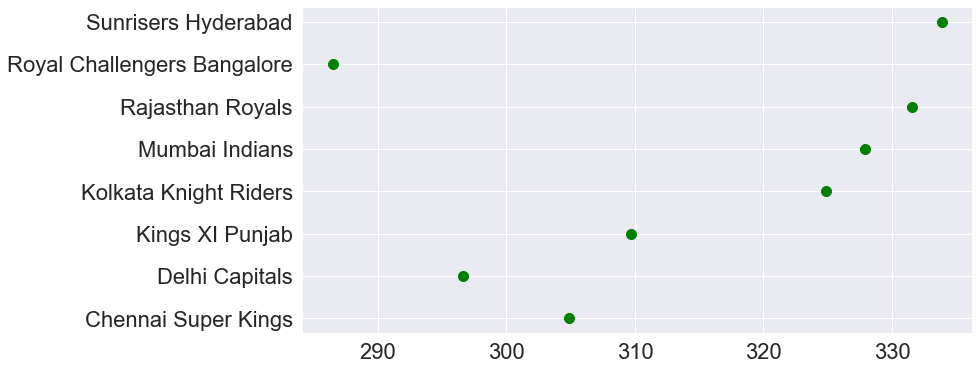

In [136]:
plt.figure(figsize=(12,6))
plt.scatter( df2['total_runs'],df2['winner'],c='green', s=100)
#plt.xticks(rotation=30)

In [137]:
seasons=list(df1['season'].unique())
seasons

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2018, 2019, 2016, 2017]

In [138]:
colors={2008:'blue',2009:'green', 2010:'brown',2011:'orange',2012:'brown', 2013:'pink', 2014:'purple', 2015:'lime', 2016:'gold', 2017:'tomato', 2018:'darkblue', 2019:'cyan'}

In [146]:
def plot_season(year):
    df2=df1[df1['season']==year]
    plt.figure(figsize=(11,8))
    plt.scatter( df2['total_runs'],df2['winner'],c=colors[year], s=100)
    plt.title('Season-wise Average runs')
    plt.xlabel('Average Runs')
    #plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12],['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Lions',
      # 'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders',
      # 'Mumbai Indians', 'Pune Warriors', 'Rajasthan Royals', 'Rising Pune Supergiant',
       #'Royal Challengers Bangalore', 'Sunrisers Hyderabad'])

In [147]:
df1['winner'].unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Lions',
       'Kings XI Punjab', 'Kochi Tuskers Kerala', 'Kolkata Knight Riders',
       'Mumbai Indians', 'Rajasthan Royals', 'Rising Pune Supergiant',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad'], dtype=object)

In [148]:
df1

,winner,season,total_runs
0,Chennai Super Kings,2008,327.222222
1,Chennai Super Kings,2009,286.000000
2,Chennai Super Kings,2010,330.555556
3,Chennai Super Kings,2011,314.636364
4,Chennai Super Kings,2012,313.700000
5,Chennai Super Kings,2013,319.583333
6,Chennai Super Kings,2014,300.600000
7,Chennai Super Kings,2015,304.900000
8,Chennai Super Kings,2018,361.818182
9,Chennai Super Kings,2019,297.900000


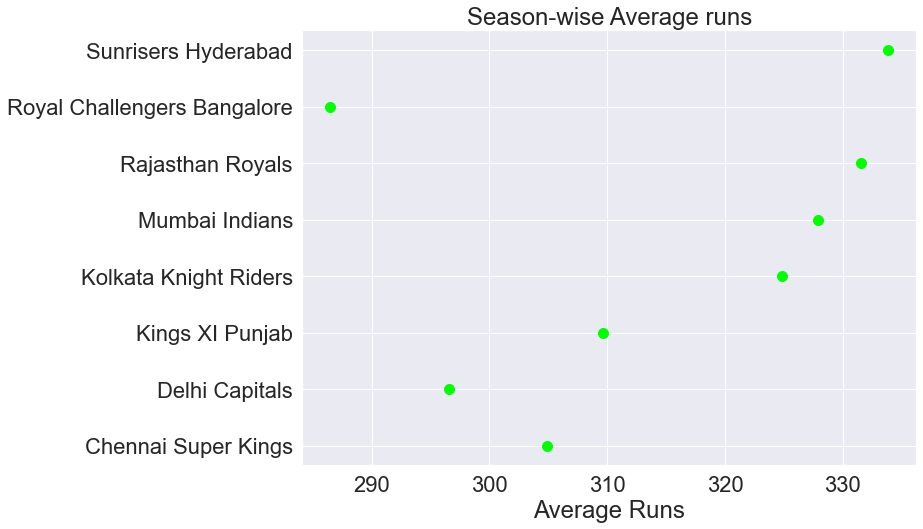

In [149]:
plot_season(2015)

In [150]:
from ipywidgets import interact, widgets

interact(plot_season, year=range(2008, 2019,1))

interactive(children=(Dropdown(description='year', options=(2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 20…

<function __main__.plot_season(year)>

In [151]:
interact(plot_season, year=widgets.IntSlider(min=2008, max=2019, step=1))

interactive(children=(IntSlider(value=2008, description='year', max=2019, min=2008), Output()), _dom_classes=(…

<function __main__.plot_season(year)>

In [136]:
plt.figure(figsize=(18,6))
sns.swarmplot(x='winner',y= 'total_runs', data=df2)

ValueError: Could not interpret input 'winner'

<Figure size 1296x432 with 0 Axes>

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['Chennai Super Kings' 'Delhi Daredevils' 'Kings XI Punjab'
 'Kolkata Knight Riders' 'Mumbai Indians' 'Rajasthan Royals'
 'Royal Challengers Bangalore' 'Sunrisers Hyderabad']

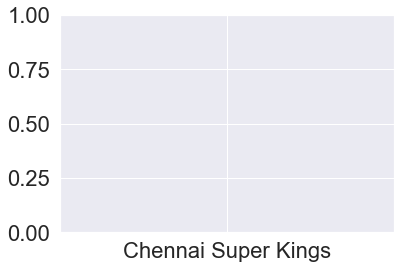

In [146]:
df2.plot.scatter('winner', 'total_runs',c='winner' ,colormap='viridis')